In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use("ggplot")
import pandas as pd
import random as rand
import string
import math
chars = string.ascii_uppercase + string.digits
%matplotlib inline
plt.rcParams["figure.figsize"] = (16,8)
import seaborn as sns
import sklearn as skl
import skimage as ski
from sklearn.preprocessing import LabelEncoder
from scipy import spatial
from sklearn.utils import shuffle
from os import system
import skimage as ski
from skimage.color import rgb2gray
from scipy import misc
from skimage.exposure import adjust_gamma
from sklearn import preprocessing
from scipy import stats
from glob import glob


In [2]:
microsats_dfNames = glob('data/*.csv')
print('Plex'+microsats_dfNames[0].split()[3] + ' '+ microsats_dfNames[0].split()[-1][:-3])
FULLdf = pd.DataFrame()

for filename in microsats_dfNames:
    alleleDF = pd.read_csv(filename)
    alleleDF= alleleDF.sort_values(by=' Sample Name')
    alleleDF =alleleDF.reset_index(drop=True) 
    FULLdf["SampleNames"] = alleleDF[" Sample Name"].copy()
    FULLdf['Plex'+filename.split()[3] + ' '+ filename.split()[-1][3:-3]+ 'A1'] = alleleDF[" Allele 1"].copy()
    FULLdf['Plex'+filename.split()[3] + ' '+ filename.split()[-1][3:-3]+ 'A2'] = alleleDF[" Allele 2"].copy()
    

FULLdf

Plex2 AinA216.


,SampleNames,Plex2 A216.A1,Plex2 A216.A2,Plex2 A108.A1,Plex2 A108.A2,Plex3 D101.A1,Plex3 D101.A2,Plex3 A2.A1,Plex3 A2.A2,Plex2 D106.A1,...,Plex2 A120.A1,Plex2 A120.A2,Plex1 D119.A1,Plex1 D119.A2,Plex1 A117.A1,Plex1 A117.A2,Plex1 A212.A1,Plex1 A212.A2,Plex3 A218.A1,Plex3 A218.A2
0,AL-001,,,,,,,,,,...,,,,,,,,,,
1,AL-002,,,,,,,,,,...,,,,,,,,,,
2,AL-003,,,,,121,121,,,,...,,,,,,,,,,
3,AL-004,,,,,,,,,,...,277,277,,,,,,,,
4,AL-005,,,,,,,,,,...,,,,,,,,,,
5,AL-006,,,,,,,,,,...,,,,,,,,,,
6,AL-007,153,161,221,237,133,141,193,209,227,...,281,346,199,199,159,163,299,341,261,291
7,AL-008,161,177,217,237,133,133,221,273,223,...,269,277,199,199,203,211,329,341,273,281
8,AL-009,165,177,225,241,137,141,189,273,223,...,277,425,199,203,199,205,321,329,277,291
9,AL-010,153,185,217,237,129,137,193,273,223,...,277,277,191,203,155,171,341,341,291,?


In [3]:
coorrectedDF = pd.read_csv('allele values.csv')
CorrectedDF = coorrectedDF.iloc[:, :-2]
print(CorrectedDF.shape)
correctedDF_woNA = CorrectedDF[CorrectedDF > 0].copy()
correctedDF_woNA = correctedDF_woNA.dropna()
correctedDF_woNA['lake'] = correctedDF_woNA['SampleNames'].apply(lambda x: x.split(sep = '-')[0])
print(correctedDF_woNA.shape)

(224, 24)
(154, 25)


In [4]:
correctedDF_woNA

,Unnamed: 0,SampleNames,Plex2-1A216.A1,Plex2-1A216.A2,Plex2-1A108.A1,Plex2-1A108.A2,Plex3-1D101.A1,Plex3-1D101.A2,Plex3-1A2.A1,Plex3-1A2.A2,...,Plex3-1A6.A2,Plex2-1A120.A1,Plex2-1A120.A2,Plex1-1D119.A1,Plex1-1D119.A2,Plex1-1A117.A1,Plex1-1A117.A2,Plex1-1A212.A1,Plex1-1A212.A2,lake
6,6.0,AL-007,153.0,161.0,221.0,237.0,133.0,141.0,193.0,209.0,...,175.0,281.0,346.0,199.0,199.0,159.0,163.0,299.0,341.0,AL
7,7.0,AL-008,161.0,177.0,217.0,237.0,133.0,133.0,221.0,273.0,...,191.0,269.0,277.0,199.0,199.0,203.0,211.0,329.0,341.0,AL
8,8.0,AL-009,165.0,177.0,225.0,241.0,137.0,141.0,189.0,273.0,...,183.0,277.0,425.0,199.0,203.0,199.0,205.0,321.0,329.0,AL
9,9.0,AL-010,153.0,185.0,217.0,237.0,129.0,137.0,193.0,273.0,...,197.0,277.0,277.0,191.0,203.0,155.0,171.0,341.0,341.0,AL
10,10.0,AL-011,153.0,165.0,213.0,237.0,133.0,151.0,189.0,273.0,...,175.0,289.0,346.0,191.0,199.0,179.0,203.0,337.0,337.0,AL
12,12.0,AL-013,161.0,185.0,217.0,225.0,141.0,141.0,193.0,221.0,...,191.0,281.0,425.0,199.0,203.0,155.0,163.0,337.0,345.0,AL
18,18.0,AL-019,147.0,165.0,217.0,217.0,133.0,133.0,209.0,221.0,...,187.0,313.0,346.0,191.0,203.0,163.0,217.0,315.0,337.0,AL
20,20.0,AL-021,165.0,169.0,217.0,257.0,133.0,137.0,193.0,273.0,...,197.0,277.0,445.0,191.0,203.0,155.0,175.0,341.0,341.0,AL
21,21.0,AL-022,161.0,169.0,209.0,237.0,133.0,133.0,197.0,221.0,...,191.0,277.0,405.0,179.0,191.0,155.0,175.0,307.0,307.0,AL
22,22.0,AL-023,161.0,177.0,209.0,233.0,137.0,141.0,193.0,197.0,...,191.0,277.0,277.0,179.0,191.0,175.0,203.0,315.0,341.0,AL


In [5]:
allelesvalues = correctedDF_woNA.iloc[:,2:-1].values


In [6]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
PCAvalues = sklearn_pca.fit_transform(allelesvalues)

In [15]:
from sklearn.manifold import TSNE
TSNEvalues = TSNE(n_components=2,  perplexity=12.0, n_iter = 5000).fit_transform(allelesvalues)

In [16]:
correctedDF_woNA["tSNE1"] = pd.Series(TSNEvalues[:,0], index = correctedDF_woNA.index)
correctedDF_woNA["tSNE2"] = pd.Series(TSNEvalues[:,1], index = correctedDF_woNA.index)
correctedDF_woNA["PC1"] = pd.Series(PCAvalues[:,0], index = correctedDF_woNA.index)
correctedDF_woNA["PC2"] = pd.Series(PCAvalues[:,1], index = correctedDF_woNA.index)

Text(0.5,1,'PCA analysis of the alleles distribution between subpopulations')

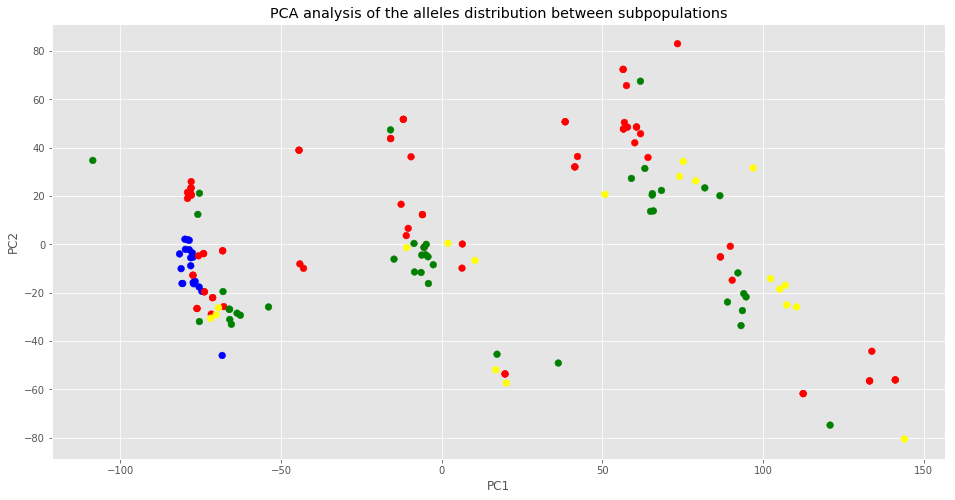

In [17]:
cmap = {' AL': 'r', ' BR': 'blue', ' GL': 'yellow', ' MP3': 'r', ' WVR': 'green'}
correctedDF_woNA.plot(x='PC1', y='PC2',s = 45, kind='scatter', 
    c=[cmap.get(c, 'black') for c in correctedDF_woNA.lake])
plt.title("PCA analysis of the alleles distribution between subpopulations")

Text(0.5,1,'tSNE analysis of the alleles distribution between subpopulations')

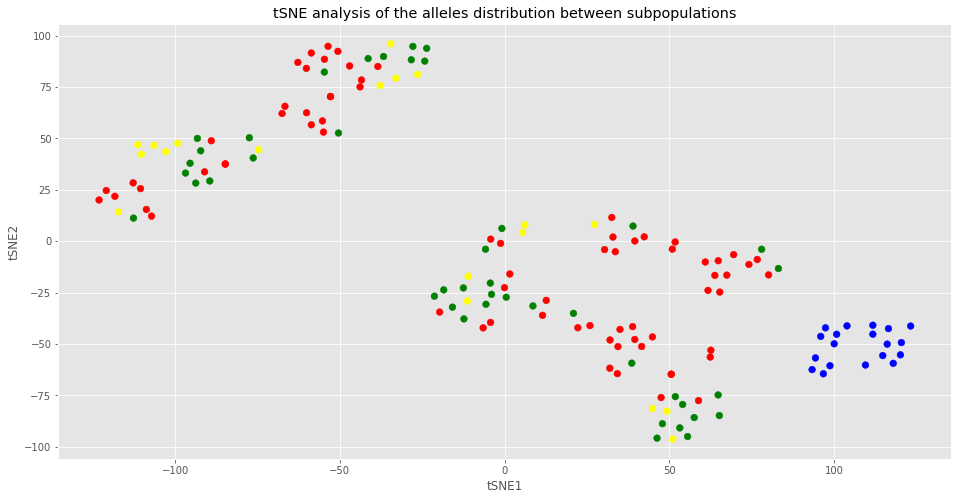

In [18]:
cmap = {' AL': 'r', ' BR': 'blue', ' GL': 'yellow', ' MP3': 'r', ' WVR': 'green'}
correctedDF_woNA.plot(x='tSNE1', y='tSNE2',s = 45, kind='scatter', 
    c=[cmap.get(c, 'black') for c in correctedDF_woNA.lake])
plt.title("tSNE analysis of the alleles distribution between subpopulations")

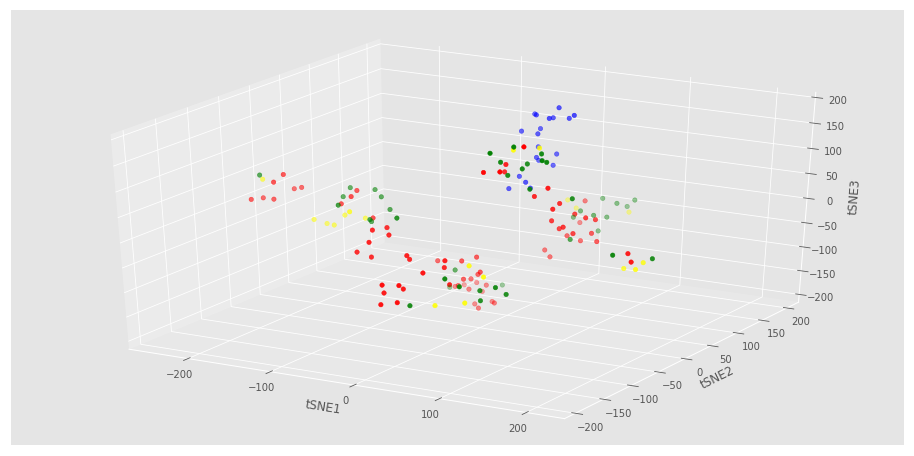

In [23]:
from mpl_toolkits.mplot3d import Axes3D
TSNEvalues3d = TSNE(n_components=3,  perplexity=7.0, n_iter = 5000).fit_transform(allelesvalues)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(TSNEvalues3d[:,0], TSNEvalues3d[:,1], TSNEvalues3d[:, 2], c=[cmap.get(c, 'black') for c in correctedDF_woNA.lake])
ax.set_xlabel('tSNE1')
ax.set_ylabel('tSNE2')
ax.set_zlabel('tSNE3')

plt.show()

Text(0.5,0,'PC3')

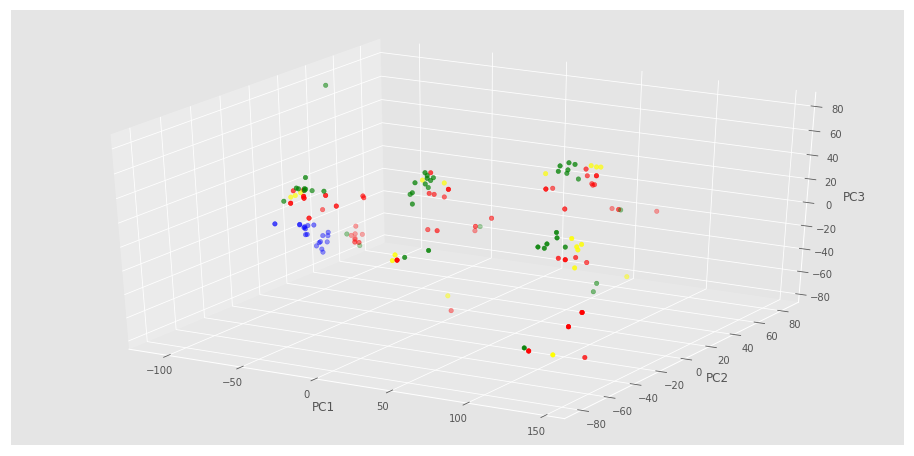

In [22]:
PCAvalues3d = sklearnPCA(n_components=3).fit_transform(allelesvalues)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(PCAvalues3d[:,0], PCAvalues3d[:,1], PCAvalues3d[:, 2], c=[cmap.get(c, 'black') for c in correctedDF_woNA.lake])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

In [96]:
def Heterozigosity(loci, pop):
    unique_elements, counts_elements = np.unique(list(pop[loci].values), return_counts=True)
    counts_elements = np.array(counts_elements/sum(counts_elements))
    return 1 - sum(counts_elements*counts_elements)

def Heterozigosity(loci, pop):
    result = 0
    for i in pop[loci].values:
        if i[0] != i[1]: result += 1
    return result/pop.shape[0]

def FIS(loci, pop):
    if Expected_Heterozigosity(loci, pop) == 0 : return 0
    return (Expected_Heterozigosity(loci, pop)-Heterozigosity(loci, pop) )/Expected_Heterozigosity(loci, pop)

def fuse_equivalents(al1, al2):
    return tuple(np.sort([al1,al2]))


def Expected_AllHeterozigosity(pop, locilist):
    return [Expected_Heterozigosity(i, pop) for i in locilist]

def FST(lake1, lake2 ,locinames):
    population = pd.concat([lake1, lake2]) 
    HA = np.array(Expected_AllHeterozigosity(lake1, locinames))
    HB = np.array(Expected_AllHeterozigosity(lake2, locinames))
    Hpop = np.array(Expected_AllHeterozigosity(population, locinames))
    #if Hpop.any(0) ==True: return np.array([0])
    return (Hpop - (HA+HB)/2)/ Hpop

['Plex2-1A216.A1', 'Plex2-1A216.A2', 'Plex2-1A108.A1', 'Plex2-1A108.A2', 'Plex3-1D101.A1', 'Plex3-1D101.A2', 'Plex3-1A2.A1', 'Plex3-1A2.A2', 'Plex2-1D106.A1', 'Plex2-1D106.A2', 'Plex1-1A203.A1', 'Plex1-1A203.A2', 'Plex3-1A6.A1', 'Plex3-1A6.A2', 'Plex2-1A120.A1', 'Plex2-1A120.A2', 'Plex1-1D119.A1', 'Plex1-1D119.A2', 'Plex1-1A117.A1', 'Plex1-1A117.A2', 'Plex1-1A212.A1', 'Plex1-1A212.A2']


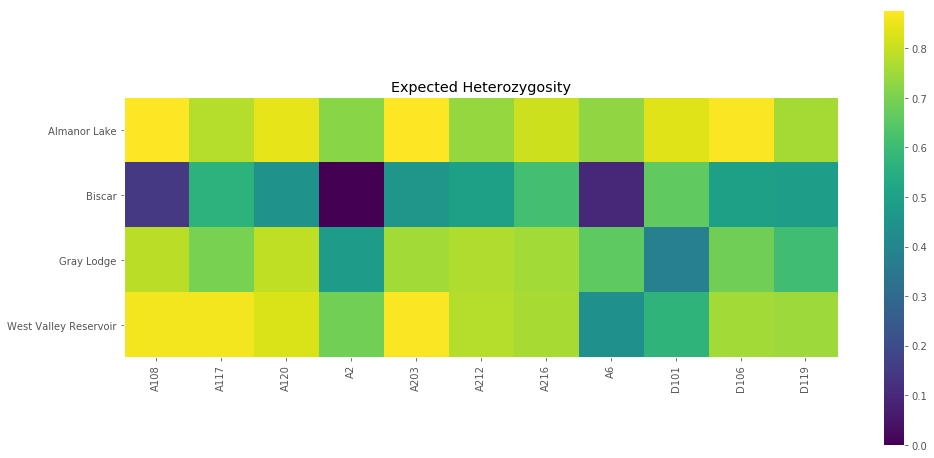

In [131]:
locinames = [correctedDF_woNA.columns[i] for i in range(correctedDF_woNA.shape[1])][2:-5]
shortlocinames 
print(locinames)

fusedDF = pd.DataFrame()
fusedDF['lake'] = correctedDF_woNA.lake.copy()

shortshortlocinames = np.unique([x.split('.')[0].split('-')[1][1:] for x in locinames])
shortlocinames= np.unique([x.split('.')[0] for x in locinames])

for i, name in enumerate(shortshortlocinames) :
    fusedDF[name] = correctedDF_woNA.apply(lambda x: fuse_equivalents(x[shortlocinames[i]+'.A1'], x[shortlocinames[i]+'.A2']), axis =1)


dfAL = fusedDF[fusedDF.lake == ' AL'].copy()
dfBR = fusedDF[fusedDF.lake == ' BR'].copy()
dfGL = fusedDF[fusedDF.lake == ' GL'].copy()
dfWVR = fusedDF[fusedDF.lake == ' WVR'].copy()

dflist = [dfAL, dfBR, dfGL, dfWVR]

ExpectedHmatrix = np.zeros((len(dflist),len(shortlocinames)))

for lcounter, loci in enumerate(shortshortlocinames): 
    for dfcounter, df in enumerate(dflist):
        ExpectedHmatrix[dfcounter, lcounter] = Expected_Heterozigosity(loci, df)
        
plt.imshow(ExpectedHmatrix)
plt.title("Expected Heterozygosity")
plt.xticks(range(len(shortshortlocinames)), shortshortlocinames, rotation='vertical')
plt.yticks(range(4), ['Almanor Lake','Biscar','Gray Lodge', 'West Valley Reservoir' ])
plt.colorbar()
plt.grid(False)
        
    


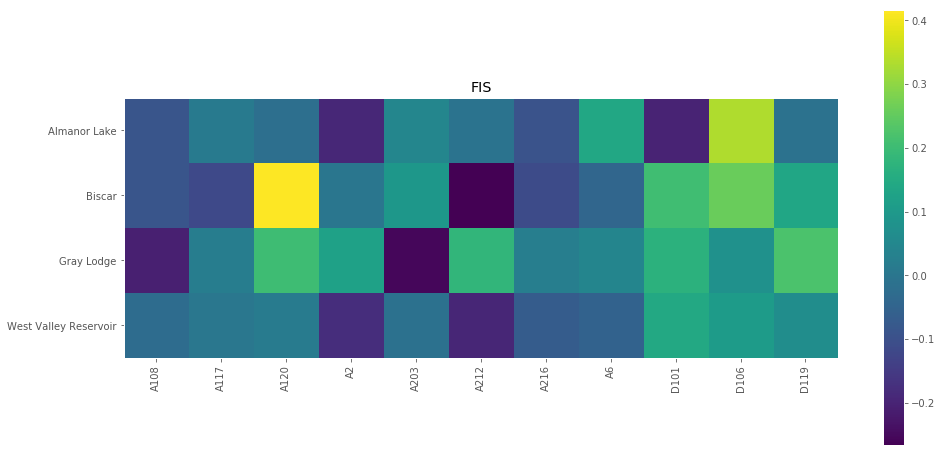

In [132]:
FISmatrix = np.zeros((len(dflist),len(shortlocinames)))

for lcounter, loci in enumerate(shortshortlocinames): 
    for dfcounter, df in enumerate(dflist):
        FISmatrix[dfcounter, lcounter] = FIS(loci, df)
        
plt.imshow(FISmatrix)
plt.title("FIS")
plt.xticks(range(len(shortshortlocinames)), shortshortlocinames, rotation='vertical')
plt.yticks(range(4), ['Almanor Lake','Biscar','Gray Lodge', 'West Valley Reservoir' ])
plt.colorbar()
plt.grid(False)
        

In [82]:
Expected_AllHeterozigosity(dfAL, shortshortlocinames)
FST(dfAL, dfBR, shortshortlocinames).mean()

0.23439503898030203

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


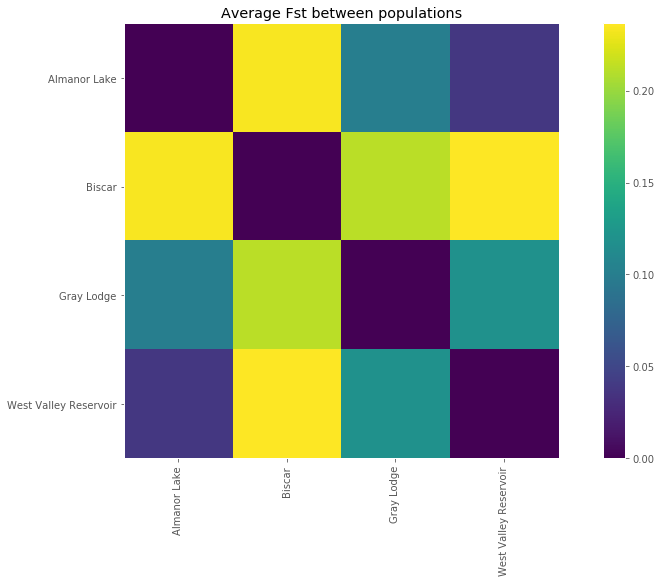

In [134]:
FSTmatrix = np.zeros((len(dflist),len(dflist)))

for lcounter, df1 in enumerate(dflist): 
    for dfcounter, df2 in enumerate(dflist):
        FSTmatrix[dfcounter, lcounter] = FST(df1, df2, shortshortlocinames).mean()
        
FSTmatrix[1,1] =0
plt.imshow(FSTmatrix)
plt.title("Average Fst between populations")
plt.xticks(range(4),['Almanor Lake','Biscar','Gray Lodge', 'West Valley Reservoir' ], rotation='vertical')
plt.yticks(range(4),['Almanor Lake','Biscar','Gray Lodge', 'West Valley Reservoir' ])
plt.colorbar()
plt.grid(False)
        

In [121]:
ALavgFST = np.array([x for x in FSTmatrix[0] if x!=0]).mean()
BRavgFST = np.array([x for x in FSTmatrix[1] if x!=0]).mean()
CLavgFST = np.array([x for x in FSTmatrix[2] if x!=0]).mean()
WVRavgFST = np.array([x for x in FSTmatrix[3] if x!=0]).mean()

In [135]:
thetaAL = 1/ALavgFST -1
thetaBR = 1/BRavgFST -1
thetaCL = 1/CLavgFST -1
thetaWVR = 1/WVRavgFST -1
print(thetaAL, thetaBR, thetaCL, thetaWVR)

7.01712315098 3.38950039445 5.92485842163 6.59612010511


In [125]:
NeAL = thetaAL/(4*10**(-2))
NeBR = thetaBR/(4*10**(-2))
NeCL = thetaCL/(4*10**(-2))
NeWVR = thetaWVR/(4*10**(-2))

print(NeAL, NeBR, NeCL, NeWVR)

175.428078774 84.7375098613 148.121460541 164.903002628
